# EDA of visualization and training a model by given attributes

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
#Load given dataset
data = p.read_csv('data.csv')
df=data.dropna()

In [4]:
df

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [5]:
df.columns

Index(['email', 'label'], dtype='object')

Spliting Train/Test:

In [6]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='label', axis=1)
#Response variable
y = df.loc[:,'label']  

In [7]:
#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  2099
Number of test dataset:  900
Total number of dataset:  2999


In [8]:
df.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
0      2500   2445                     url URL date not supplied URL    10
1       499    427  lowest rates available for term life insurance...    5

Text(0.5, 1.0, 'Distribution of label ')

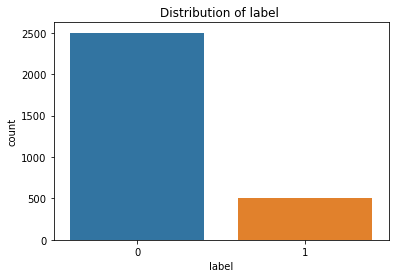

In [9]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "label", data = df)
df.loc[:, 'label'].value_counts()
plt.title('Distribution of label ')

In [10]:
df['label'].unique()

array([0, 1], dtype=int64)

Training model:

In [11]:
#!pip install nltk

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['email']=df['email'].str.strip()
# lowercase the text
df['email'] = df['email'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['email']=df['email'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['email'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [ ]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'email':],df['label'],test_size=0.2)

In [ ]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in X['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1

In [ ]:
#!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

ham=' '.join(X.loc[y==0,'final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(ham)

spam=' '.join(X.loc[y==1,'final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(spam)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

